# Free Trial Performance Analysis in SQL# Hrishikesh Dipak DesaiHow much is a free trial worth? In this project, we learn how to use SQL to analyze marketing data for a free trial of a product. You’ll summarize and aggregate data to calculate the sorts of metrics that are the bread and butter of any marketing analyst role.This live training will require only SQL and Workspace, it will not involve R or Python.

## The Data

## Data Deals

We'll be using synthetic data that was created for this training. This data represents a product that is sold via a 1-month free trial. The Free Trials table records instances of customers beginning a free trial. 1 month after the free trial period starts, the customer may choose to pay, and if so we will have a Purchase record.

There are four tables:

### Free Trials
A list of instances of free trials starts.

- Trial ID - An ID unique to the Free Trial.
- Free Trial Start Date - The date when the customer began their free trial.
- Region - The world region where the customer is located.

### Purchases
A list of instances of customers paying, following their free trial.

- Trial ID - The ID of the free trial, from the Free Trials table. This ID is unique as each trial may have a maximum of 1 purchase asociated with it.
- Purchase Date - The date when the customer made their purchase, 1 month after they began their free trial.
- Purchase Value - The USD value of the Customer's purchase.

### Dates
A list of dates, provided for convenience.

- Date - A sequential list of dates.
- Month - The first of the month for each date.

### Prices
_Optional_ - a list of prices of the product by region over time. This table will not be used in the live training, and is for optional follow-up activity. Prices are set on a Monthly basis, but the price for each customer is set at the beginning of their free trial, so subsequent price changes will not affect a customer.

- Free Trial Start Month - the month of free trials that the price applies to.
- Region - the customer's world region, as in the Free Trials table.
- The price that will be locked in at the beginning of the customer's Free Trial, based on their Free Trial Start Month & Region.

![Screenshot 2022-12-16 at 11.32.58](Screenshot%202022-12-16%20at%2011.32.58.png)

In [1]:
select * from trials

trial_id free_trial_start_date    region       
1     A31021   2022-01-01T00:00:00.000Z North America
2     A31022   2022-01-01T00:00:00.000Z Oceania      
3     A31023   2022-01-01T00:00:00.000Z Europe       
4     A31024   2022-01-01T00:00:00.000Z Europe       
5     A31025   2022-01-01T00:00:00.000Z North America
6     A31026   2022-01-01T00:00:00.000Z Asia         
7     A31027   2022-01-01T00:00:00.000Z Europe       
8     A31028   2022-01-01T00:00:00.000Z Africa       
9     A31029   2022-01-01T00:00:00.000Z Europe       
10    A31030   2022-01-01T00:00:00.000Z Asia         
11    A31031   2022-01-01T00:00:00.000Z Africa       
12    A31032   2022-01-01T00:00:00.000Z Asia         
13    A31033   2022-01-01T00:00:00.000Z North America
14    A31034   2022-01-01T00:00:00.000Z Asia         
15    A31035   2022-01-01T00:00:00.000Z North America
16    A31036   2022-01-01T00:00:00.000Z Europe       
17    A31037   2022-01-01T00:00:00.000Z Oceania      
18    A31038   2022-01-01T00:00:00.000Z Asia         
19    A31039   2022-01-01T00:00:00.000Z Africa       
20    A31040   2022-01-01T00:00:00.000Z Asia         
21    A31041   2022-01-01T00:00:00.000Z Asia         
22    A31042   2022-01-01T00:00:00.000Z Europe       
23    A31043   2022-01-01T00:00:00.000Z North America
24    A31044   2022-01-01T00:00:00.000Z Oceania      
25    A31045   2022-01-01T00:00:00.000Z Asia         
26    A31046   2022-01-01T00:00:00.000Z North America
27    A31047   2022-01-01T00:00:00.000Z North America
28    A31048   2022-01-01T00:00:00.000Z Asia         
29    A31049   2022-01-01T00:00:00.000Z Africa       
30    A31050   2022-01-01T00:00:00.000Z Africa       
⋮     ⋮        ⋮                        ⋮            
30210 A63542   2022-06-30T00:00:00.000Z Europe       
30211 A63543   2022-06-30T00:00:00.000Z Europe       
30212 A63545   2022-06-30T00:00:00.000Z Europe       
30213 A63546   2022-06-30T00:00:00.000Z Asia         
30214 A63547   2022-06-30T00:00:00.000Z Oceania      
30215 A63548   2022-06-30T00:00:00.000Z Europe       
30216 A63549   2022-06-30T00:00:00.000Z North America
30217 A63550   2022-06-30T00:00:00.000Z North America
30218 A63551   2022-06-30T00:00:00.000Z Africa       
30219 A63552   2022-06-30T00:00:00.000Z Europe       
30220 A63553   2022-06-30T00:00:00.000Z Asia         
30221 A63554   2022-06-30T00:00:00.000Z Asia         
30222 A63555   2022-06-30T00:00:00.000Z Asia         
30223 A63556   2022-06-30T00:00:00.000Z North America
30224 A63557   2022-06-30T00:00:00.000Z Africa       
30225 A63558   2022-06-30T00:00:00.000Z Africa       
30226 A63560   2022-06-30T00:00:00.000Z Asia         
30227 A63561   2022-06-30T00:00:00.000Z Europe       
30228 A63562   2022-06-30T00:00:00.000Z Europe       
30229 A63563   2022-06-30T00:00:00.000Z Africa       
30230 A63564   2022-06-30T00:00:00.000Z Asia         
30231 A63565   2022-06-30T00:00:00.000Z Europe       
30232 A63566   2022-06-30T00:00:00.000Z Africa       
30233 A63567   2022-06-30T00:00:00.000Z Africa       
30234 A63568   2022-06-30T00:00:00.000Z Africa       
30235 A63569   2022-06-30T00:00:00.000Z North America
30236 A63570   2022-06-30T00:00:00.000Z North America
30237 A63571   2022-06-30T00:00:00.000Z Asia         
30238 A63572   2022-06-30T00:00:00.000Z Europe       
30239 A63573   2022-06-30T00:00:00.000Z Asia

In [2]:
select * from purchases

trial_id purchase_date            purchase_value
1     A31027   2022-02-01T00:00:00.000Z 200           
2     A31030   2022-02-01T00:00:00.000Z 200           
3     A31034   2022-02-01T00:00:00.000Z 200           
4     A31035   2022-02-01T00:00:00.000Z 200           
5     A31040   2022-02-01T00:00:00.000Z 200           
6     A31044   2022-02-01T00:00:00.000Z 200           
7     A31045   2022-02-01T00:00:00.000Z 200           
8     A31046   2022-02-01T00:00:00.000Z 200           
9     A31047   2022-02-01T00:00:00.000Z 200           
10    A31048   2022-02-01T00:00:00.000Z 200           
11    A31051   2022-02-01T00:00:00.000Z 200           
12    A31059   2022-02-01T00:00:00.000Z 200           
13    A31061   2022-02-01T00:00:00.000Z 200           
14    A31063   2022-02-01T00:00:00.000Z 200           
15    A31070   2022-02-01T00:00:00.000Z 200           
16    A31074   2022-02-01T00:00:00.000Z 200           
17    A31075   2022-02-01T00:00:00.000Z 200           
18    A31077   2022-02-01T00:00:00.000Z 200           
19    A31079   2022-02-01T00:00:00.000Z 200           
20    A31087   2022-02-01T00:00:00.000Z 200           
21    A31089   2022-02-01T00:00:00.000Z 200           
22    A31091   2022-02-01T00:00:00.000Z 200           
23    A31092   2022-02-01T00:00:00.000Z 200           
24    A31096   2022-02-02T00:00:00.000Z 200           
25    A31098   2022-02-02T00:00:00.000Z 200           
26    A31105   2022-02-02T00:00:00.000Z 200           
27    A31111   2022-02-02T00:00:00.000Z 200           
28    A31112   2022-02-02T00:00:00.000Z 200           
29    A31113   2022-02-02T00:00:00.000Z 200           
30    A31115   2022-02-02T00:00:00.000Z 200           
⋮     ⋮        ⋮                        ⋮             
9981  A63405   2022-07-30T00:00:00.000Z 200           
9982  A63407   2022-07-30T00:00:00.000Z 200           
9983  A63408   2022-07-30T00:00:00.000Z 200           
9984  A63414   2022-07-30T00:00:00.000Z 200           
9985  A63417   2022-07-30T00:00:00.000Z 200           
9986  A63422   2022-07-30T00:00:00.000Z 250           
9987  A63429   2022-07-30T00:00:00.000Z 250           
9988  A63442   2022-07-30T00:00:00.000Z 250           
9989  A63444   2022-07-30T00:00:00.000Z 200           
9990  A63452   2022-07-30T00:00:00.000Z 200           
9991  A63457   2022-07-30T00:00:00.000Z 200           
9992  A63458   2022-07-30T00:00:00.000Z 250           
9993  A63459   2022-07-30T00:00:00.000Z 200           
9994  A63468   2022-07-30T00:00:00.000Z 200           
9995  A63471   2022-07-30T00:00:00.000Z 250           
9996  A63472   2022-07-30T00:00:00.000Z 200           
9997  A63476   2022-07-30T00:00:00.000Z 200           
9998  A63484   2022-07-30T00:00:00.000Z 200           
9999  A63488   2022-07-30T00:00:00.000Z 250           
10000 A63491   2022-07-30T00:00:00.000Z 250           
10001 A63496   2022-07-30T00:00:00.000Z 250           
10002 A63510   2022-07-30T00:00:00.000Z 250           
10003 A63516   2022-07-30T00:00:00.000Z 200           
10004 A63527   2022-07-30T00:00:00.000Z 250           
10005 A63537   2022-07-30T00:00:00.000Z 200           
10006 A63540   2022-07-30T00:00:00.000Z 200           
10007 A63548   2022-07-30T00:00:00.000Z 250           
10008 A63556   2022-07-30T00:00:00.000Z 250           
10009 A63565   2022-07-30T00:00:00.000Z 250           
10010 A63569   2022-07-30T00:00:00.000Z 250

## 1. Getting Familiar with the Data

We will query the Free Trials & Purchases tables, and produce graphs showing the volume of both of these over time.

a) Group `trials` by the month of `free_trial_start_date` (and order by the same).

Count the rows as `num_free_trials`.

In [3]:
select
        date_trunc('month', free_trial_start_date) as month
    ,	count(*) as num_free_trials
from trials
    group by 1
    order by 1

month                    num_free_trials
1 2022-01-01T00:00:00.000Z 3871           
2 2022-02-01T00:00:00.000Z 4054           
3 2022-03-01T00:00:00.000Z 5190           
4 2022-04-01T00:00:00.000Z 5393           
5 2022-05-01T00:00:00.000Z 5688           
6 2022-06-01T00:00:00.000Z 6043

b) Group `purchases` by the month of `purchase_date` (and order by the same).

Count the rows as `num_purchases`, and sum `purchase_value` as `usd_value`.

Call the output `purchases_by_month`.

In [4]:
select
        date_trunc('month', purchase_date) as month
    ,	count(*) as num_purchases
    ,	sum(purchase_value) as usd_value
from purchases
    group by 1
    order by 1

month                    num_purchases usd_value
1 2022-02-01T00:00:00.000Z 1269          253800   
2 2022-03-01T00:00:00.000Z 1277          255400   
3 2022-04-01T00:00:00.000Z 1730          346000   
4 2022-05-01T00:00:00.000Z 3150          315000   
5 2022-06-01T00:00:00.000Z 1262          286950   
6 2022-07-01T00:00:00.000Z 1322          300500

c) Create a line graph of `num_purchases` by `month`.

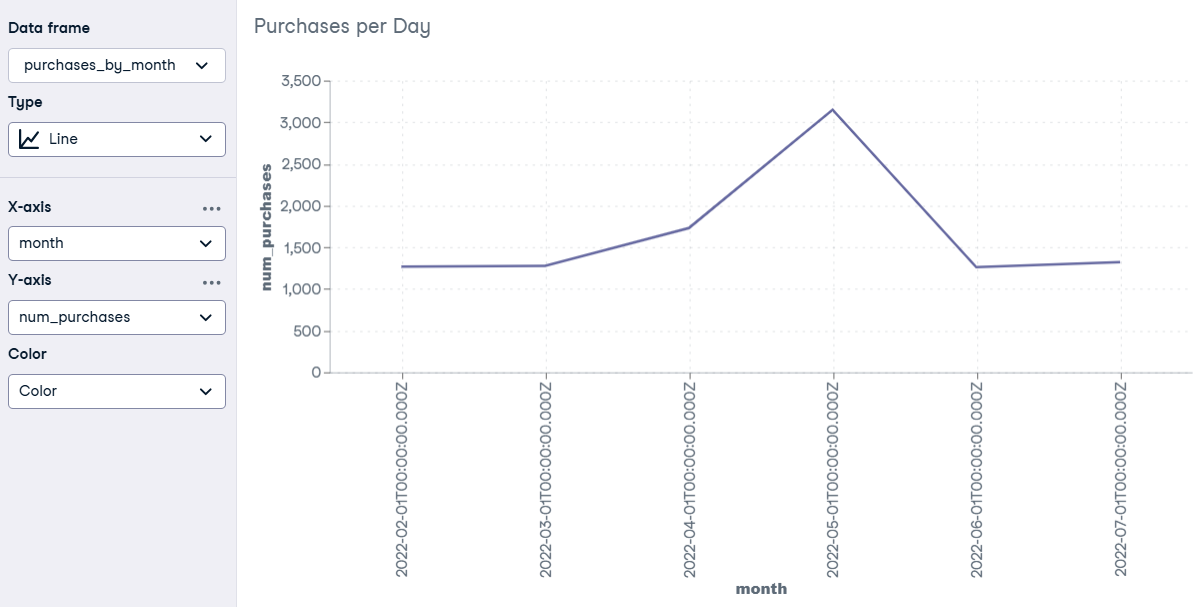

## 2. Data Aggregation 1 - Velocity Metrics by Month

We will pull metrics for Free Trial Starts, Purchases, and Gross Merchandise Value by month from the Free Trials & Purchases tables.

a) Now that we can aggregate the data by month, create both summaries as Common Table Expressions (CTEs), and _left join_ our purchases per month against the free trials per month to get the results into a combined results table.

In [6]:
with free_trials_per_month as (
    select
            date_trunc('month', free_trial_start_date) as month
        ,	count(*) as num_free_trials
    from trials
        group by 1
        order by 1
)

,	purchases_per_month as (
    select
            date_trunc('month', purchase_date) as month
        ,	count(*) as num_purchases
        ,	sum(purchase_value) as usd_value
    from purchases
        group by 1
        order by 1
)

select
		free_trials_per_month.month
    ,	free_trials_per_month.num_free_trials
    ,	purchases_per_month.num_purchases
    ,	purchases_per_month.usd_value
from free_trials_per_month
	left join purchases_per_month
    	on purchases_per_month.month = free_trials_per_month.month

month                    num_free_trials num_purchases usd_value
1 2022-01-01T00:00:00.000Z 3871              NA              NA   
2 2022-02-01T00:00:00.000Z 4054            1269          253800   
3 2022-03-01T00:00:00.000Z 5190            1277          255400   
4 2022-04-01T00:00:00.000Z 5393            1730          346000   
5 2022-05-01T00:00:00.000Z 5688            3150          315000   
6 2022-06-01T00:00:00.000Z 6043            1262          286950

Do you notice that there's some data missing? When we _left join_ `purchases_per_month`, we only match against months that exist in `free_trials_per_month`. There are several ways to solve this.

b) Do the same aggregation again, but this time _outer join_ the results.

In [7]:
with free_trials_per_month as (
    select
            date_trunc('month', free_trial_start_date) as month
        ,	count(*) as num_free_trials
    from trials
        group by 1
        order by 1
)

,	purchases_per_month as (
    select
            date_trunc('month', purchase_date) as month
        ,	count(*) as num_purchases
        ,	sum(purchase_value) as usd_value
    from purchases
        group by 1
        order by 1
)

select
		coalesce(free_trials_per_month.month, purchases_per_month.month) as month
    ,	free_trials_per_month.num_free_trials
    ,	purchases_per_month.num_purchases
    ,	purchases_per_month.usd_value
from free_trials_per_month
	full join purchases_per_month
    	on purchases_per_month.month = free_trials_per_month.month

month                    num_free_trials num_purchases usd_value
1 2022-01-01T00:00:00.000Z 3871              NA              NA   
2 2022-02-01T00:00:00.000Z 4054            1269          253800   
3 2022-03-01T00:00:00.000Z 5190            1277          255400   
4 2022-04-01T00:00:00.000Z 5393            1730          346000   
5 2022-05-01T00:00:00.000Z 5688            3150          315000   
6 2022-06-01T00:00:00.000Z 6043            1262          286950   
7 2022-07-01T00:00:00.000Z   NA            1322          300500

Gaps in your summary data is a common problem when using SQL for data analysis. It happens when you have data sets that don't quite match up, or gaps in your time frame.

Another way to solve this would be to avoid joining the tables directly to one another, and instead join both tables to a base table that contains all the rows you need - usually something like a `dates` table.

## 3. Data Aggregation 2 - Cohort Metrics by Month

We will discuss the differences between Velocity & Cohort Metrics, and then join the tables in order to pull the equivalent Cohort Metrics by Month.

In our answer to Question 2, we showed counts of Purchases & Free trials by month without regard for the fact that _those purchases will all correspond to free trials for the previous month_. This means that the `num_purchases` and `usd_value` metrics we calculated were what's sometimes called 'velocity' or 'naïve' metrics; they represent a simple comparison of other metrics in a time period. This is why we have no Purchases data for the first month and no Free Trials data for the last month.

Velocity metrics are easy to calculate, and they are great for regular trading meetings because they don't change retrospectively. The number of sales we had yesterday is a fixed quantity, whereas the free trials that were started yesterday haven't had time to turn into sales yet. However, they aren't always the clearest way of looking at the data - in the above it looks like we had a terrible January.

Alternatively, we can join each purchase against its corresponding Free Trial and look at it all by Free Trial Start Date. This allows us to look at the conversion rate of group of people who all started their free trials at the same time, called a _cohort_. That means we compare January's performance vs. the other months.

Cohort metrics are a fairer comparison, especially when there are aspects that are particular to a time-based cohort (such as a temporarily reduced price for a sale). However, they take time to mature. You don't always want to spend today's trading looking an entire month back in time.

a) Select all columns in `trials`, and left join the columns in `purchases` on their shared `trial_id` column.

In [8]:
select
        trials.trial_id
    ,	trials.free_trial_start_date
	,	trials.region
    ,	purchases.purchase_date
	,	purchases.purchase_value
from trials
	left join purchases
    	on purchases.trial_id = trials.trial_id

trial_id free_trial_start_date    region        purchase_date           
1     A31021   2022-01-01T00:00:00.000Z North America NA                      
2     A31022   2022-01-01T00:00:00.000Z Oceania       NA                      
3     A31023   2022-01-01T00:00:00.000Z Europe        NA                      
4     A31024   2022-01-01T00:00:00.000Z Europe        NA                      
5     A31025   2022-01-01T00:00:00.000Z North America NA                      
6     A31026   2022-01-01T00:00:00.000Z Asia          NA                      
7     A31027   2022-01-01T00:00:00.000Z Europe        2022-02-01T00:00:00.000Z
8     A31028   2022-01-01T00:00:00.000Z Africa        NA                      
9     A31029   2022-01-01T00:00:00.000Z Europe        NA                      
10    A31030   2022-01-01T00:00:00.000Z Asia          2022-02-01T00:00:00.000Z
11    A31031   2022-01-01T00:00:00.000Z Africa        NA                      
12    A31032   2022-01-01T00:00:00.000Z Asia          NA                      
13    A31033   2022-01-01T00:00:00.000Z North America NA                      
14    A31034   2022-01-01T00:00:00.000Z Asia          2022-02-01T00:00:00.000Z
15    A31035   2022-01-01T00:00:00.000Z North America 2022-02-01T00:00:00.000Z
16    A31036   2022-01-01T00:00:00.000Z Europe        NA                      
17    A31037   2022-01-01T00:00:00.000Z Oceania       NA                      
18    A31038   2022-01-01T00:00:00.000Z Asia          NA                      
19    A31039   2022-01-01T00:00:00.000Z Africa        NA                      
20    A31040   2022-01-01T00:00:00.000Z Asia          2022-02-01T00:00:00.000Z
21    A31041   2022-01-01T00:00:00.000Z Asia          NA                      
22    A31042   2022-01-01T00:00:00.000Z Europe        NA                      
23    A31043   2022-01-01T00:00:00.000Z North America NA                      
24    A31044   2022-01-01T00:00:00.000Z Oceania       2022-02-01T00:00:00.000Z
25    A31045   2022-01-01T00:00:00.000Z Asia          2022-02-01T00:00:00.000Z
26    A31046   2022-01-01T00:00:00.000Z North America 2022-02-01T00:00:00.000Z
27    A31047   2022-01-01T00:00:00.000Z North America 2022-02-01T00:00:00.000Z
28    A31048   2022-01-01T00:00:00.000Z Asia          2022-02-01T00:00:00.000Z
29    A31049   2022-01-01T00:00:00.000Z Africa        NA                      
30    A31050   2022-01-01T00:00:00.000Z Africa        NA                      
⋮     ⋮        ⋮                        ⋮             ⋮                       
30210 A63542   2022-06-30T00:00:00.000Z Europe        NA                      
30211 A63543   2022-06-30T00:00:00.000Z Europe        NA                      
30212 A63545   2022-06-30T00:00:00.000Z Europe        NA                      
30213 A63546   2022-06-30T00:00:00.000Z Asia          NA                      
30214 A63547   2022-06-30T00:00:00.000Z Oceania       NA                      
30215 A63548   2022-06-30T00:00:00.000Z Europe        2022-07-30T00:00:00.000Z
30216 A63549   2022-06-30T00:00:00.000Z North America NA                      
30217 A63550   2022-06-30T00:00:00.000Z North America NA                      
30218 A63551   2022-06-30T00:00:00.000Z Africa        NA                      
30219 A63552   2022-06-30T00:00:00.000Z Europe        NA                      
30220 A63553   2022-06-30T00:00:00.000Z Asia          NA                      
30221 A63554   2022-06-30T00:00:00.000Z Asia          NA                      
30222 A63555   2022-06-30T00:00:00.000Z Asia          NA                      
30223 A63556   2022-06-30T00:00:00.000Z North America 2022-07-30T00:00:00.000Z
30224 A63557   2022-06-30T00:00:00.000Z Africa        NA                      
30225 A63558   2022-06-30T00:00:00.000Z Africa        NA                      
30226 A63560   2022-06-30T00:00:00.000Z Asia          NA                      
30227 A63561   2022-06-30T00:00:00.000Z Europe        NA                      
30228 A63562   2022-06-30T00:00:00.000Z Europe        NA

b) Aggregate all the data by the month of the Free Trial start, and calculate the same metrics as before; `num_free_trials`, `num_purchases`, and `usd_value`. Remember that _sum_ and _count_ both ignore _NULL_ values.

In [9]:
with free_trials_and_purchases as (
	select
            trials.trial_id
        ,	trials.free_trial_start_date
        ,	trials.region
        ,	purchases.purchase_date
        ,	purchases.purchase_value
    from trials
        left join purchases
            on purchases.trial_id = trials.trial_id
)

select
		date_trunc('month', free_trial_start_date) as month
    ,	count(*) as num_free_trials
    ,	count(purchase_date) as num_purchases -- We count how many dates exist to see how many purchases occurred.
    ,	sum(purchase_value) as usd_value
from free_trials_and_purchases
        group by 1
        order by 1

month                    num_free_trials num_purchases usd_value
1 2022-01-01T00:00:00.000Z 3871            1269          253800   
2 2022-02-01T00:00:00.000Z 4054            1277          255400   
3 2022-03-01T00:00:00.000Z 5190            1730          346000   
4 2022-04-01T00:00:00.000Z 5393            3150          315000   
5 2022-05-01T00:00:00.000Z 5688            1262          286950   
6 2022-06-01T00:00:00.000Z 6043            1322          300500

Counting the non-nulls is very handy, but you should be careful with this kind of approach as different versions of SQL may handle _NULL_ values differently. You also have to be confident that the column you are counting over is populated in every case you want to count - or in other words that there is a date for every purchase (and no purchase date when there is no purchase).

## 4. Free Trial Value Calculation

Using the Cohort table we've already put together, we will calculate an average value per Free Trial for each month.

a) Take the aggregation above, and create an additional metric called `cohort_value_per_free_trial` by dividing `purchase_value` by `num_free_trials`. 

In [10]:
with free_trials_and_purchases as (
	select
            trials.trial_id
        ,	trials.free_trial_start_date
        ,	trials.region
        ,	purchases.purchase_date
        ,	purchases.purchase_value
    from trials
        left join purchases
            on purchases.trial_id = trials.trial_id
)

,	summary_by_month as (
    select
            date_trunc('month', free_trial_start_date) as month
        ,	count(*) as num_free_trials
        ,	count(purchase_date) as num_purchases
        ,	sum(purchase_value) as usd_value
    from free_trials_and_purchases
            group by 1
)

select
		month
	,	num_free_trials
    ,	num_purchases
    ,	usd_value
    ,	(usd_value::float) / (nullif(num_free_trials, 0)::float) as cohort_value_per_free_trial -- It's important to avoid dividing by Zero, so we replace any zero values in the denominator with NULL. We also convert to FLOAT before dividing to ensure that the result is accurate.
from summary_by_month
	order by 1 -- Order By only matters on the last statement.

month                    num_free_trials num_purchases usd_value
1 2022-01-01T00:00:00.000Z 3871            1269          253800   
2 2022-02-01T00:00:00.000Z 4054            1277          255400   
3 2022-03-01T00:00:00.000Z 5190            1730          346000   
4 2022-04-01T00:00:00.000Z 5393            3150          315000   
5 2022-05-01T00:00:00.000Z 5688            1262          286950   
6 2022-06-01T00:00:00.000Z 6043            1322          300500   
  cohort_value_per_free_trial
1 65.56445                   
2 62.99951                   
3 66.66667                   
4 58.40905                   
5 50.44831                   
6 49.72696

## 5. Dimensional Breakdown

We will break down our average value per Free Trial by Region, to see how the values differ.

a) Taking the same code as before, introduce and group by the additional dimension, `region`. Call the resultant table `cohort_value_by_month_and_region`.

In [11]:
with free_trials_and_purchases as (
	select
            trials.trial_id
        ,	trials.free_trial_start_date
        ,	trials.region
        ,	purchases.purchase_date
        ,	purchases.purchase_value
    from trials
        left join purchases
            on purchases.trial_id = trials.trial_id
)

,	summary_by_month as (
    select
            date_trunc('month', free_trial_start_date) as month
    	,	region
        ,	count(*) as num_free_trials
        ,	count(purchase_date) as num_purchases
        ,	sum(purchase_value) as usd_value
    from free_trials_and_purchases
            group by 1, 2
)

select
		month
    ,	region
	,	num_free_trials
    ,	num_purchases
    ,	usd_value
    ,	(usd_value::float) / (nullif(num_free_trials, 0)::float) as cohort_value_per_free_trial
from summary_by_month
	order by 1, 2

month                    region        num_free_trials num_purchases
1  2022-01-01T00:00:00.000Z Africa         653              85         
2  2022-01-01T00:00:00.000Z Asia           732             244         
3  2022-01-01T00:00:00.000Z Europe         989             368         
4  2022-01-01T00:00:00.000Z North America 1016             412         
5  2022-01-01T00:00:00.000Z Oceania        350             141         
6  2022-01-01T00:00:00.000Z South America  131              19         
7  2022-02-01T00:00:00.000Z Africa         743              81         
8  2022-02-01T00:00:00.000Z Asia           800             248         
9  2022-02-01T00:00:00.000Z Europe        1030             381         
10 2022-02-01T00:00:00.000Z North America  995             393         
11 2022-02-01T00:00:00.000Z Oceania        356             157         
12 2022-02-01T00:00:00.000Z South America  130              17         
13 2022-03-01T00:00:00.000Z Africa         964             143         
14 2022-03-01T00:00:00.000Z Asia          1038             319         
15 2022-03-01T00:00:00.000Z Europe        1133             460         
16 2022-03-01T00:00:00.000Z North America 1380             546         
17 2022-03-01T00:00:00.000Z Oceania        497             230         
18 2022-03-01T00:00:00.000Z South America  178              32         
19 2022-04-01T00:00:00.000Z Africa        1019             341         
20 2022-04-01T00:00:00.000Z Asia          1093             563         
21 2022-04-01T00:00:00.000Z Europe        1181             798         
22 2022-04-01T00:00:00.000Z North America 1474            1119         
23 2022-04-01T00:00:00.000Z Oceania        425             287         
24 2022-04-01T00:00:00.000Z South America  201              42         
25 2022-05-01T00:00:00.000Z Africa        1145             156         
26 2022-05-01T00:00:00.000Z Asia          1192             370         
27 2022-05-01T00:00:00.000Z Europe        1192             254         
28 2022-05-01T00:00:00.000Z North America 1595             322         
29 2022-05-01T00:00:00.000Z Oceania        347             115         
30 2022-05-01T00:00:00.000Z South America  217              45         
31 2022-06-01T00:00:00.000Z Africa        1233             166         
32 2022-06-01T00:00:00.000Z Asia          1358             400         
33 2022-06-01T00:00:00.000Z Europe        1193             268         
34 2022-06-01T00:00:00.000Z North America 1747             365         
35 2022-06-01T00:00:00.000Z Oceania        293              89         
36 2022-06-01T00:00:00.000Z South America  219              34         
   usd_value cohort_value_per_free_trial
1   17000    26.03369                   
2   48800    66.66667                   
3   73600    74.41860                   
4   82400    81.10236                   
5   28200    80.57143                   
6    3800    29.00763                   
7   16200    21.80350                   
8   49600    62.00000                   
9   76200    73.98058                   
10  78600    78.99497                   
11  31400    88.20225                   
12   3400    26.15385                   
13  28600    29.66805                   
14  63800    61.46435                   
15  92000    81.20035                   
16 109200    79.13043                   
17  46000    92.55533                   
18   6400    35.95506                   
19  34100    33.46418                   
20  56300    51.50961                   
21  79800    67.56986                   
22 111900    75.91588                   
23  28700    67.52941                   
24   4200    20.89552                   
25  31200    27.24891                   
26  74000    62.08054                   
27  63500    53.27181                   
28  80500    50.47022                   
29  28750    82.85303                   
30   9000    41.47465                   
31  33200    26.92620                   
32  80000    58.91016      

b) Create a graph of `cohort_value_per_free_trial` by Month & Region

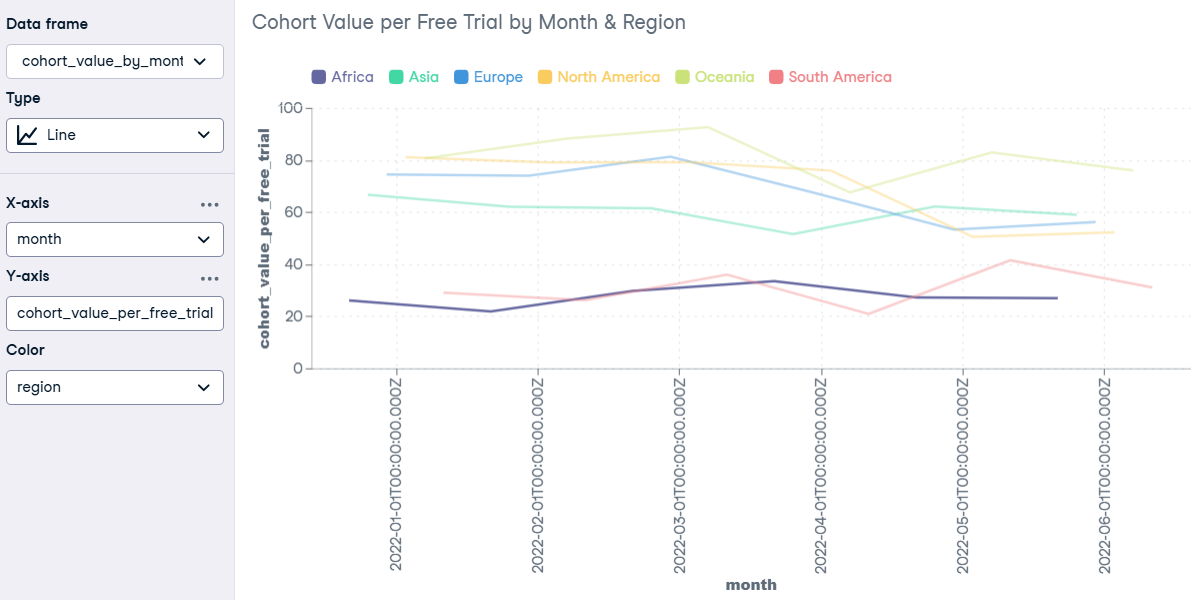